<a href="https://colab.research.google.com/github/martinaramirez-udp/Portafolio/blob/Etapa-3/Portafolio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Antonia Rioseco / Martina Ramirez

## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


In [31]:
#Instalación de librerias

!pip -q install wbgapi scikit-learn

import numpy as np
import pandas as pd

import wbgapi as wb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
indicadores = [
    "NY.GDP.PCAP.CD",    #PIB per cap
    "SP.POP.TOTL",       #Total de población
    "SP.DYN.LE00.IN",     #Expectativa de vida
    "SE.XPD.TOTL.GD.ZS",   #Gasto público en educación
    "SH.XPD.CHEX.GD.ZS",   #Gasto en salud (% del PIB)
    "NE.TRD.GNFS.ZS",      #Comercio (% del PIB)
    "NV.AGR.TOTL.ZS",      #Agricultura
    "NV.IND.TOTL.ZS",      #Industria
    "NV.SRV.TOTL.ZS",      #Servicios
    "SP.URB.TOTL.IN.ZS",   #Población urbanaa
    "EG.USE.PCAP.KG.OE",   #Uso de energía
    "EN.ATM.CO2E.PC",      #Emisión de CO2
]

In [33]:
#Datos

year = 2023

datos = wb.data.DataFrame(indicadores, time=year, labels=True).reset_index()
datos.head()

,economy,Country,EG.USE.PCAP.KG.OE,NE.TRD.GNFS.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SE.XPD.TOTL.GD.ZS,SH.XPD.CHEX.GD.ZS,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,NaN,40.291261,11.494869,33.255552,49.563454,2195.224921,0.384771,NaN,62.775000,16340822.0,39.291937
1,ZMB,Zambia,NaN,78.241887,2.230120,35.107778,56.816764,1330.727806,4.073749,NaN,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,NaN,79.533166,5.703752,15.580544,58.534618,3455.028529,NaN,NaN,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.519512,104917.0,95.274079


,economy,Country,EG.USE.PCAP.KG.OE,NE.TRD.GNFS.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SE.XPD.TOTL.GD.ZS,SH.XPD.CHEX.GD.ZS,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,NaN,40.291261,11.494869,33.255552,49.563454,2195.224921,0.384771,NaN,62.775000,16340822.0,39.291937
1,ZMB,Zambia,NaN,78.241887,2.230120,35.107778,56.816764,1330.727806,4.073749,NaN,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,NaN,79.533166,5.703752,15.580544,58.534618,3455.028529,NaN,NaN,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.519512,104917.0,95.274079


In [34]:
print(datos.columns)

Index(['economy', 'Country', 'EG.USE.PCAP.KG.OE', 'NE.TRD.GNFS.ZS',
       'NV.AGR.TOTL.ZS', 'NV.IND.TOTL.ZS', 'NV.SRV.TOTL.ZS', 'NY.GDP.PCAP.CD',
       'SE.XPD.TOTL.GD.ZS', 'SH.XPD.CHEX.GD.ZS', 'SP.DYN.LE00.IN',
       'SP.POP.TOTL', 'SP.URB.TOTL.IN.ZS'],
      dtype='object')
Index(['economy', 'Country', 'EG.USE.PCAP.KG.OE', 'NE.TRD.GNFS.ZS',
       'NV.AGR.TOTL.ZS', 'NV.IND.TOTL.ZS', 'NV.SRV.TOTL.ZS', 'NY.GDP.PCAP.CD',
       'SE.XPD.TOTL.GD.ZS', 'SH.XPD.CHEX.GD.ZS', 'SP.DYN.LE00.IN',
       'SP.POP.TOTL', 'SP.URB.TOTL.IN.ZS'],
      dtype='object')


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

In [35]:
datos.head()

,economy,Country,EG.USE.PCAP.KG.OE,NE.TRD.GNFS.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SE.XPD.TOTL.GD.ZS,SH.XPD.CHEX.GD.ZS,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,NaN,40.291261,11.494869,33.255552,49.563454,2195.224921,0.384771,NaN,62.775000,16340822.0,39.291937
1,ZMB,Zambia,NaN,78.241887,2.230120,35.107778,56.816764,1330.727806,4.073749,NaN,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,NaN,79.533166,5.703752,15.580544,58.534618,3455.028529,NaN,NaN,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.519512,104917.0,95.274079


,economy,Country,EG.USE.PCAP.KG.OE,NE.TRD.GNFS.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SE.XPD.TOTL.GD.ZS,SH.XPD.CHEX.GD.ZS,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,NaN,40.291261,11.494869,33.255552,49.563454,2195.224921,0.384771,NaN,62.775000,16340822.0,39.291937
1,ZMB,Zambia,NaN,78.241887,2.230120,35.107778,56.816764,1330.727806,4.073749,NaN,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,NaN,79.533166,5.703752,15.580544,58.534618,3455.028529,NaN,NaN,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.519512,104917.0,95.274079


* Revisión básica del dataset con el fin de mirar y revisar su estructura básica - *identificando elementos como países, años, las variables disponibles, etc* - además de elementos como el total de observaciones, para dimensionar de mejor forma el análisis y limitaciones de datos.

In [36]:
estadisticas = datos.describe().T
estadisticas[['mean', '50%', 'std', 'min', 'max']]

,mean,50%,std,min,max
EG.USE.PCAP.KG.OE,2.625160e+03,2.293708e+03,1.974140e+03,291.050601,1.568570e+04
NE.TRD.GNFS.ZS,8.917793e+01,7.359092e+01,5.691845e+01,2.473729,4.025670e+02
NV.AGR.TOTL.ZS,1.005421e+01,6.979635e+00,9.387214e+00,0.015093,3.850929e+01
NV.IND.TOTL.ZS,2.629341e+01,2.533140e+01,1.136528e+01,2.086302,7.889953e+01
NV.SRV.TOTL.ZS,5.638622e+01,5.634447e+01,1.202208e+01,18.767186,9.145617e+01
NY.GDP.PCAP.CD,2.009550e+04,7.672613e+03,3.087982e+04,250.627253,2.567998e+05
SE.XPD.TOTL.GD.ZS,3.817455e+00,3.514816e+00,1.955497e+00,0.000008,1.639053e+01
SH.XPD.CHEX.GD.ZS,8.631555e+00,8.991660e+00,2.190005e+00,3.579288,1.179903e+01
SP.DYN.LE00.IN,7.345860e+01,7.384400e+01,6.960836e+00,54.462000,8.637200e+01
SP.POP.TOTL,3.283978e+08,1.064485e+07,1.012445e+09,9816.000000,8.064058e+09


,mean,50%,std,min,max
EG.USE.PCAP.KG.OE,2.625160e+03,2.293708e+03,1.974140e+03,291.050601,1.568570e+04
NE.TRD.GNFS.ZS,8.917793e+01,7.359092e+01,5.691845e+01,2.473729,4.025670e+02
NV.AGR.TOTL.ZS,1.005421e+01,6.979635e+00,9.387214e+00,0.015093,3.850929e+01
NV.IND.TOTL.ZS,2.629341e+01,2.533140e+01,1.136528e+01,2.086302,7.889953e+01
NV.SRV.TOTL.ZS,5.638622e+01,5.634447e+01,1.202208e+01,18.767186,9.145617e+01
NY.GDP.PCAP.CD,2.009550e+04,7.672613e+03,3.087982e+04,250.627253,2.567998e+05
SE.XPD.TOTL.GD.ZS,3.817455e+00,3.514816e+00,1.955497e+00,0.000008,1.639053e+01
SH.XPD.CHEX.GD.ZS,8.631555e+00,8.991660e+00,2.190005e+00,3.579288,1.179903e+01
SP.DYN.LE00.IN,7.345860e+01,7.384400e+01,6.960836e+00,54.462000,8.637200e+01
SP.POP.TOTL,3.283978e+08,1.064485e+07,1.012445e+09,9816.000000,8.064058e+09


* Estadisticas descriptivas "básicas" tales como media, mediana, desviación estándar, etc. Lo cual permite tener una primera aproximación al rango, dispersión, magnitud de las variables analizadas


In [37]:
#Dejamos el país como indice
pais = "Economy" if "Economy" in datos.columns else "economy"

# Filtrar los indicadores que realmente se encuentran en el DataFrame 'datos'
n_indicadores = [col for col in indicadores if col in datos.columns]

df = datos.set_index(pais)[n_indicadores].copy()
df.head()

,NY.GDP.PCAP.CD,SP.POP.TOTL,SP.DYN.LE00.IN,SE.XPD.TOTL.GD.ZS,SH.XPD.CHEX.GD.ZS,NE.TRD.GNFS.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,SP.URB.TOTL.IN.ZS,EG.USE.PCAP.KG.OE
economy,,,,,,,,,,,
ZWE,2195.224921,16340822.0,62.775000,0.384771,NaN,40.291261,11.494869,33.255552,49.563454,39.291937,NaN
ZMB,1330.727806,20723965.0,66.349000,4.073749,NaN,78.241887,2.230120,35.107778,56.816764,45.028585,NaN
YEM,NaN,39390799.0,69.295000,NaN,NaN,NaN,NaN,NaN,NaN,36.570798,NaN
PSE,3455.028529,5165775.0,65.170000,NaN,NaN,79.533166,5.703752,15.580544,58.534618,86.857687,NaN
VIR,NaN,104917.0,80.519512,NaN,NaN,NaN,NaN,NaN,NaN,95.274079,NaN


,NY.GDP.PCAP.CD,SP.POP.TOTL,SP.DYN.LE00.IN,SE.XPD.TOTL.GD.ZS,SH.XPD.CHEX.GD.ZS,NE.TRD.GNFS.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,SP.URB.TOTL.IN.ZS,EG.USE.PCAP.KG.OE
economy,,,,,,,,,,,
ZWE,2195.224921,16340822.0,62.775000,0.384771,NaN,40.291261,11.494869,33.255552,49.563454,39.291937,NaN
ZMB,1330.727806,20723965.0,66.349000,4.073749,NaN,78.241887,2.230120,35.107778,56.816764,45.028585,NaN
YEM,NaN,39390799.0,69.295000,NaN,NaN,NaN,NaN,NaN,NaN,36.570798,NaN
PSE,3455.028529,5165775.0,65.170000,NaN,NaN,79.533166,5.703752,15.580544,58.534618,86.857687,NaN
VIR,NaN,104917.0,80.519512,NaN,NaN,NaN,NaN,NaN,NaN,95.274079,NaN


In [38]:
na  = datos.isna().mean() * 100
na_2 = na.sort_values(ascending=False).to_frame(name='NA (%)')
na_2

,NA (%)
SH.XPD.CHEX.GD.ZS,92.105263
EG.USE.PCAP.KG.OE,65.789474
SE.XPD.TOTL.GD.ZS,41.353383
NE.TRD.GNFS.ZS,19.172932
NV.SRV.TOTL.ZS,11.654135
NV.AGR.TOTL.ZS,11.278195
NV.IND.TOTL.ZS,11.278195
NY.GDP.PCAP.CD,5.263158
SP.DYN.LE00.IN,0.375940
SP.POP.TOTL,0.375940


,NA (%)
SH.XPD.CHEX.GD.ZS,92.105263
EG.USE.PCAP.KG.OE,65.789474
SE.XPD.TOTL.GD.ZS,41.353383
NE.TRD.GNFS.ZS,19.172932
NV.SRV.TOTL.ZS,11.654135
NV.AGR.TOTL.ZS,11.278195
NV.IND.TOTL.ZS,11.278195
NY.GDP.PCAP.CD,5.263158
SP.DYN.LE00.IN,0.375940
SP.POP.TOTL,0.375940


In [39]:
# Variables con menos de 15% de NA (se imputan)
imputada = na[na < 15].index.tolist()

# Variables con 15% o más de NA (se eliminan)
eliminada = na[na >= 15].index.tolist()

imputada , eliminada

(['economy',
  'Country',
  'NV.AGR.TOTL.ZS',
  'NV.IND.TOTL.ZS',
  'NV.SRV.TOTL.ZS',
  'NY.GDP.PCAP.CD',
  'SP.DYN.LE00.IN',
  'SP.POP.TOTL',
  'SP.URB.TOTL.IN.ZS'],
 ['EG.USE.PCAP.KG.OE',
  'NE.TRD.GNFS.ZS',
  'SE.XPD.TOTL.GD.ZS',
  'SH.XPD.CHEX.GD.ZS'])

(['economy',
  'Country',
  'NV.AGR.TOTL.ZS',
  'NV.IND.TOTL.ZS',
  'NV.SRV.TOTL.ZS',
  'NY.GDP.PCAP.CD',
  'SP.DYN.LE00.IN',
  'SP.POP.TOTL',
  'SP.URB.TOTL.IN.ZS'],
 ['EG.USE.PCAP.KG.OE',
  'NE.TRD.GNFS.ZS',
  'SE.XPD.TOTL.GD.ZS',
  'SH.XPD.CHEX.GD.ZS'])

In [40]:
# Eliminamos variables con muchos NA
datos1 = datos.drop(columns=eliminada)

datos1.head()

,economy,Country,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,11.494869,33.255552,49.563454,2195.224921,62.775000,16340822.0,39.291937
1,ZMB,Zambia,2.230120,35.107778,56.816764,1330.727806,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,5.703752,15.580544,58.534618,3455.028529,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,80.519512,104917.0,95.274079


,economy,Country,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,11.494869,33.255552,49.563454,2195.224921,62.775000,16340822.0,39.291937
1,ZMB,Zambia,2.230120,35.107778,56.816764,1330.727806,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,5.703752,15.580544,58.534618,3455.028529,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,80.519512,104917.0,95.274079


In [41]:
#Imputación de datos (15%)

# Identificamos las columnas numéricas presentes en datos1 que necesitan ser imputadas
num = [col for col in imputada if col in datos1.select_dtypes(include=np.number).columns]

imputados = SimpleImputer(strategy = "mean")
datos1[num] = imputados.fit_transform(datos1[num])

datos1.head()

,economy,Country,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,11.494869,33.255552,49.563454,2195.224921,62.775000,16340822.0,39.291937
1,ZMB,Zambia,2.230120,35.107778,56.816764,1330.727806,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",10.054214,26.293406,56.386215,20095.500023,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,5.703752,15.580544,58.534618,3455.028529,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),10.054214,26.293406,56.386215,20095.500023,80.519512,104917.0,95.274079


,economy,Country,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,11.494869,33.255552,49.563454,2195.224921,62.775000,16340822.0,39.291937
1,ZMB,Zambia,2.230120,35.107778,56.816764,1330.727806,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",10.054214,26.293406,56.386215,20095.500023,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,5.703752,15.580544,58.534618,3455.028529,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),10.054214,26.293406,56.386215,20095.500023,80.519512,104917.0,95.274079


* Se calcula el porcentaje de los datos nulos por variable. Las variables con menos de un 15% de valores nulos se mantienen para una imputación, mientras que las que tienen un porcentaje mayor, se eliminan para evitar sesgos.

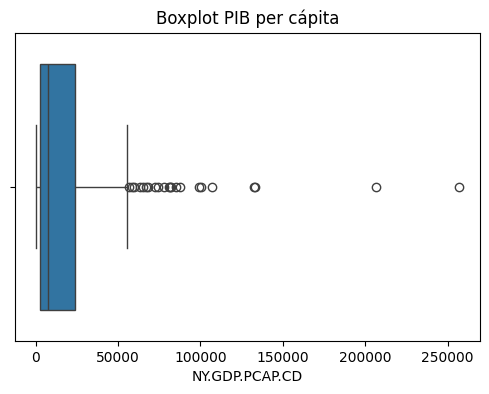

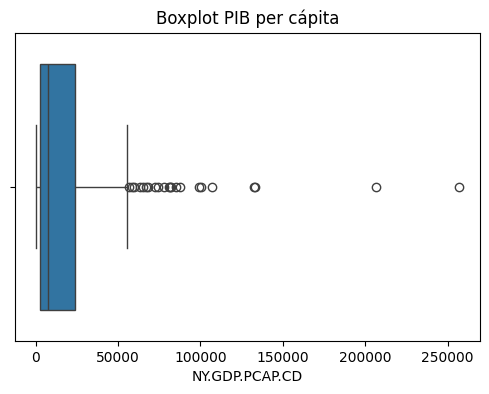

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(x=datos['NY.GDP.PCAP.CD'])
plt.title("Boxplot PIB per cápita")
plt.show()

* Boxplot para identificar valores atípicos.

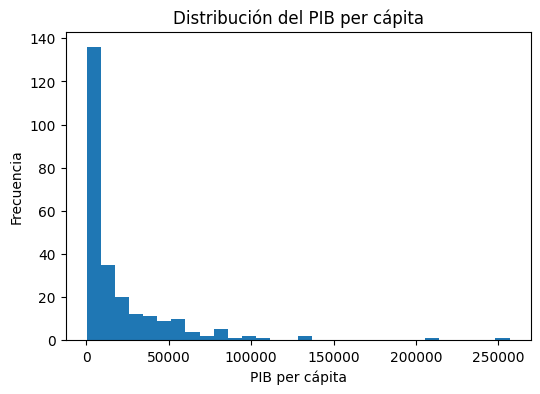

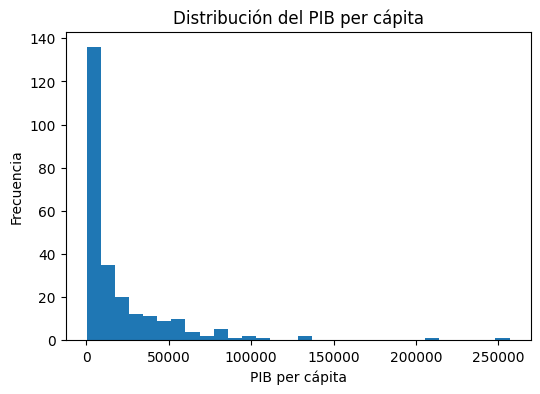

In [43]:
plt.figure(figsize=(6,4))
plt.hist(datos['NY.GDP.PCAP.CD'].dropna(), bins=30)
plt.title("Distribución del PIB per cápita")
plt.xlabel("PIB per cápita")
plt.ylabel("Frecuencia")
plt.show()

* Distribución asimetrica del PIB

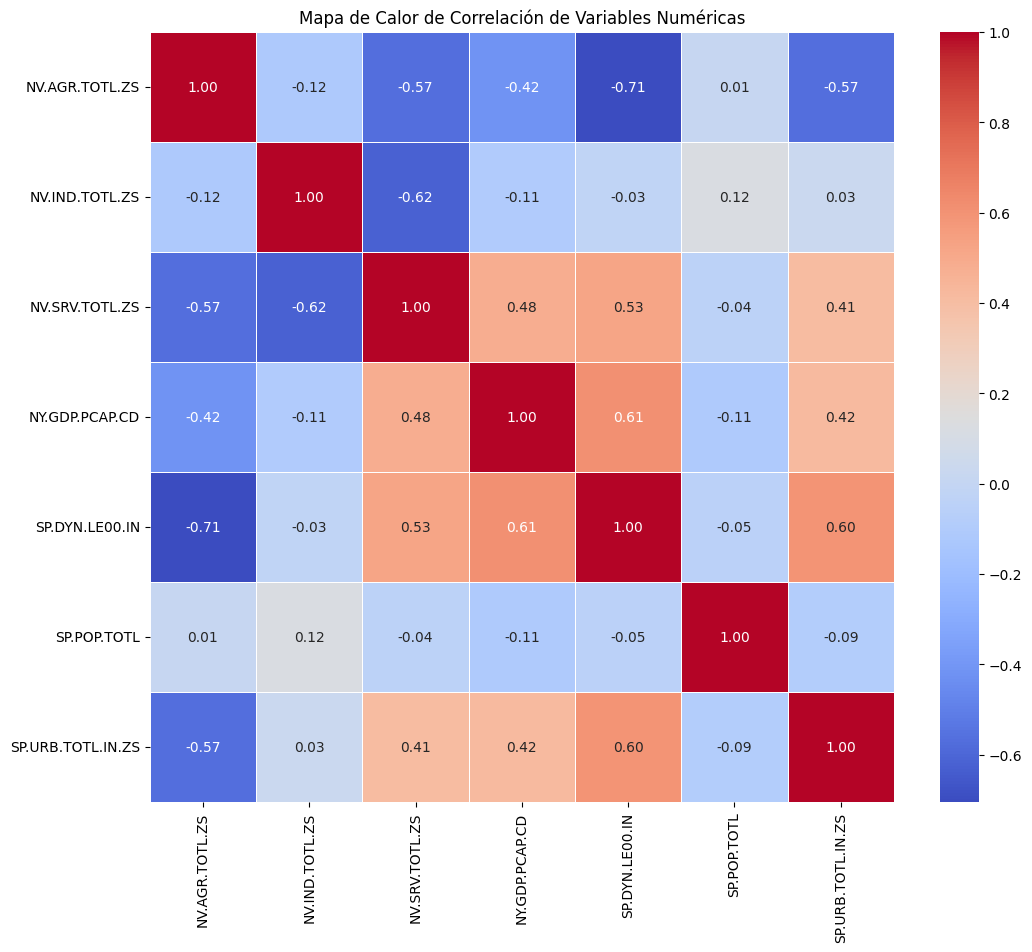

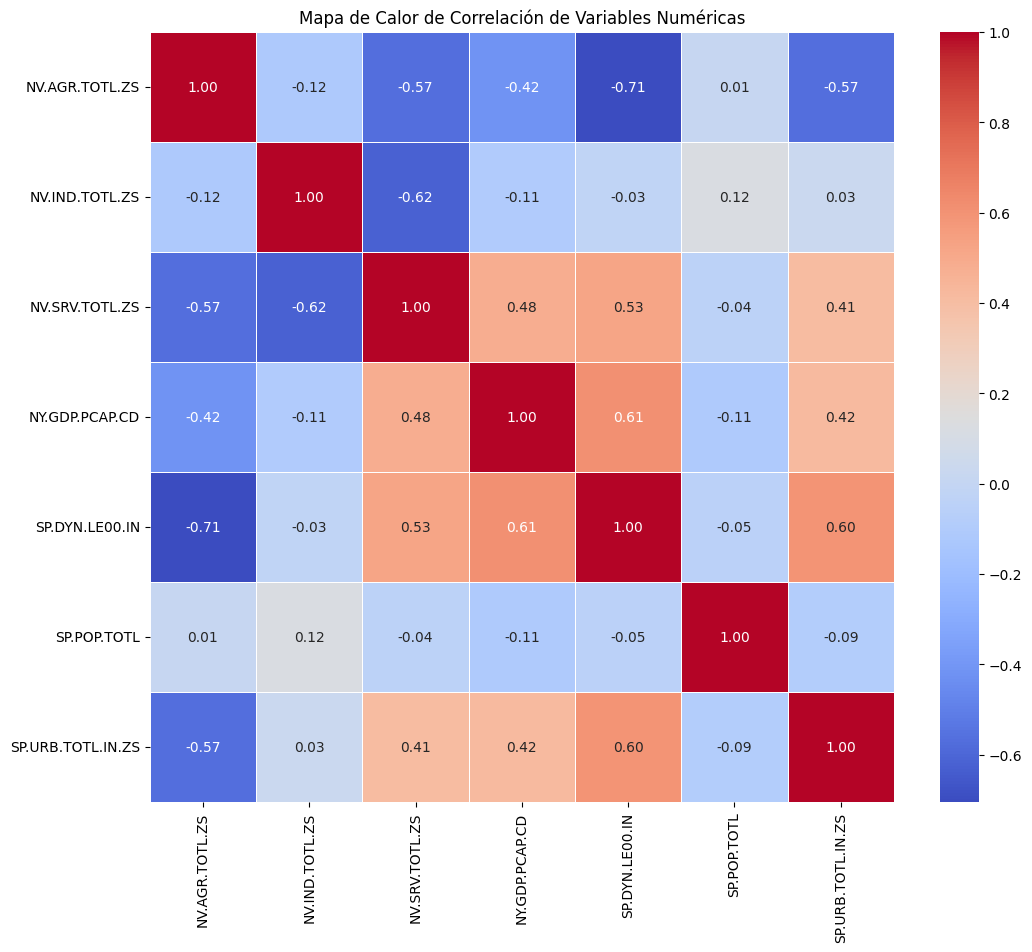

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = datos1.select_dtypes(include=['number']).columns

if 'NY.GDP.PCAP.CD_discretizada' in numericas:
    numericas = numericas.drop('NY.GDP.PCAP.CD_discretizada')

# Calcular la matriz de correlación. Se eliminan las filas con NaN para este cálculo.
corr_matrix = datos1[numericas].dropna().corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas')
plt.show()

* El mapa de calor nos ayuda a observar mediante colores las diferencias regionales en el nivel del PIB.

Evidenciando la concentración de mayores niveles de ingreso en ciertas regiones del mundo.

In [45]:
datos['NY.GDP.PCAP.CD_discretizada'] = pd.qcut(
    datos['NY.GDP.PCAP.CD'],
    q=5,
    labels=['Bajo', 'Medio Bajo', 'Medio', 'Medio Alto', 'Alto']
)

In [46]:
datos['NY.GDP.PCAP.CD_discretizada'].value_counts()

,count
NY.GDP.PCAP.CD_discretizada,
Bajo,51
Alto,51
Medio Bajo,50
Medio,50
Medio Alto,50


,count
NY.GDP.PCAP.CD_discretizada,
Bajo,51
Alto,51
Medio Bajo,50
Medio,50
Medio Alto,50


### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [47]:
#Librerias necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [48]:
#Selección de variable númerica
X = datos1.drop(columns=['NY.GDP.PCAP.CD', 'economy', 'Country'], errors='ignore')
X = X.select_dtypes(include=['number']).copy()

imputacion = SimpleImputer(strategy='mean')
X_imp = pd.DataFrame(imputacion.fit_transform(X), columns=X.columns, index=X.index)

#Estandarizar las variables
estandar = StandardScaler()
X_st = estandar.fit_transform(X_imp)
X_st = pd.DataFrame(X_st, columns=X.columns, index=X.index)

print("Dimensión de X_scaled:", X_st.shape)
X_st.head()

Dimensión de X_scaled: (266, 6)


,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,1.632790e-01,0.651733,-0.605081,-1.540618,-0.309386,-1.009824
1,-8.867561e-01,0.825122,0.038184,-1.025233,-0.305041,-0.749000
2,2.013262e-16,0.000000,0.000000,-0.600408,-0.286534,-1.133544
3,-4.930665e-01,-1.002841,0.190532,-1.195250,-0.320466,1.152816
4,2.013262e-16,0.000000,0.000000,1.018212,-0.325483,1.535478


Dimensión de X_scaled: (266, 6)


,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,1.632790e-01,0.651733,-0.605081,-1.540618,-0.309386,-1.009824
1,-8.867561e-01,0.825122,0.038184,-1.025233,-0.305041,-0.749000
2,2.013262e-16,0.000000,0.000000,-0.600408,-0.286534,-1.133544
3,-4.930665e-01,-1.002841,0.190532,-1.195250,-0.320466,1.152816
4,2.013262e-16,0.000000,0.000000,1.018212,-0.325483,1.535478


* Se seleccionaron únicamente aquellas *variables númericas*, para luego poder aplicar PCA (el cual puede aplicarse unicamente en variables numericas).

Luego de eso, se estandarizan las variables para asegurar que todas contribuyan de manera correcta el análisis, evitando un sesgo en los resultados.

In [49]:
#Aplicación del PCA

pca_f = PCA()
pca_f.fit(X_st)

PCA()

PCA()

In [50]:
var_explicativa = pca_f.explained_variance_ratio_
var_explicativa

cum_var = var_explicativa.cumsum()
cum_var

array([0.4559281 , 0.6893734 , 0.85399494, 0.93132155, 0.98377425,
       1.        ])

array([0.4559281 , 0.6893734 , 0.85399494, 0.93132155, 0.98377425,
       1.        ])

In [51]:
# Tabla de varianza explicada
pca_var = pd.DataFrame({
    'Componente': range(1, len(var_explicativa) + 1),
    'Varianza explicada': var_explicativa,
    'Varianza acumulada': cum_var
})

pca_var

,Componente,Varianza explicada,Varianza acumulada
0,1,0.455928,0.455928
1,2,0.233445,0.689373
2,3,0.164622,0.853995
3,4,0.077327,0.931322
4,5,0.052453,0.983774
5,6,0.016226,1.000000


,Componente,Varianza explicada,Varianza acumulada
0,1,0.455928,0.455928
1,2,0.233445,0.689373
2,3,0.164622,0.853995
3,4,0.077327,0.931322
4,5,0.052453,0.983774
5,6,0.016226,1.000000


Inicialmente se aplica PCA sin restringir el número de componentes, con el fin de analizar la varianza explicada individual y acumulada.

Lo que permite identificar cuantas componentes son necesarias para representar de la mejor manera posible el dataframe

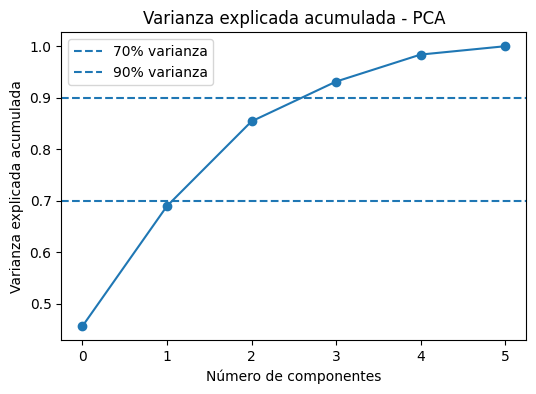

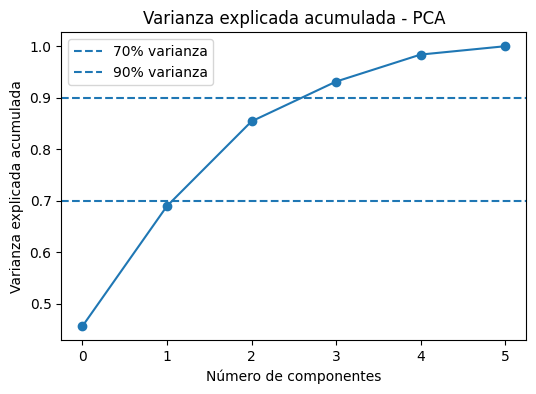

In [52]:
#Grafico de varianza acumulada

plt.figure(figsize=(6,4))
plt.plot(cum_var, marker='o')
plt.axhline(0.7, linestyle='--', label='70% varianza')
plt.axhline(0.9, linestyle='--', label='90% varianza')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada - PCA')
plt.legend()
plt.show()

El grafico permite identificar visualmente el punto a partir del cual agregar más componentes aporta rendimientos decrecientes en términos de información adicional.

In [53]:
#Selección del número de componentes

n_components = np.argmax(cum_var >= 0.8) + 1
print("Número de componentes seleccionados:", n_components)

Número de componentes seleccionados: 3
Número de componentes seleccionados: 3


Se selecciona el número de componentes que permite explicar cerca del 80% de la varianza total

In [54]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_st)

X_pca.shape

(266, 3)

(266, 3)

In [55]:
#Crea un nuevo df

pca_columns = [f'PC{i+1}' for i in range(n_components)]

df_pca = pd.DataFrame(
    X_pca,
    columns=pca_columns,
    index=datos1.index
)

df_pca.head()

,PC1,PC2,PC3
0,-1.711726,0.164497,-0.349120
1,-0.502417,0.463593,-0.245637
2,-0.814569,-0.418501,-0.114534
3,0.422625,-0.766379,-0.265015
4,1.255374,0.450880,-0.534110


,PC1,PC2,PC3
0,-1.711726,0.164497,-0.349120
1,-0.502417,0.463593,-0.245637
2,-0.814569,-0.418501,-0.114534
3,0.422625,-0.766379,-0.265015
4,1.255374,0.450880,-0.534110


In [56]:
#Agregamos la variable objetivo discretizada al DataFrame PCA
df_pca['NY.GDP.PCAP.CD_discretizada'] = datos['NY.GDP.PCAP.CD_discretizada']
df_pca.head()

,PC1,PC2,PC3,NY.GDP.PCAP.CD_discretizada
0,-1.711726,0.164497,-0.349120,Medio Bajo
1,-0.502417,0.463593,-0.245637,Bajo
2,-0.814569,-0.418501,-0.114534,NaN
3,0.422625,-0.766379,-0.265015,Medio Bajo
4,1.255374,0.450880,-0.534110,NaN


,PC1,PC2,PC3,NY.GDP.PCAP.CD_discretizada
0,-1.711726,0.164497,-0.349120,Medio Bajo
1,-0.502417,0.463593,-0.245637,Bajo
2,-0.814569,-0.418501,-0.114534,NaN
3,0.422625,-0.766379,-0.265015,Medio Bajo
4,1.255374,0.450880,-0.534110,NaN


El nuevo DataFrame contiene únicamente las componentes principales seleccionadas y la variable objetivo discretizada.

##Etapa Final:

**Implementación y Comparación de Modelos de Clasificación**

En esta etapa final del proyecto se procede a la implementación de modelos de clasificación, con el propósito de evaluar el efecto de la reducción de dimensionalidad sobre el desempeño predictivo y la estructura del problema. Las fases de proyecto son las siguientes:

1. En primer lugar, se construyen dos modelos de clasificación utilizando el conjunto de datos **original**, es decir, considerando la totalidad de las variables explicativas sin aplicar técnicas de reducción de dimensionalidad. Esta aproximación permite establecer una línea base (baseline) para el análisis comparativo posterior.

2. Posteriormente, se desarrollan los mismos modelos de clasificación empleando como variables de entrada las componentes principales obtenidas en la etapa de reducción de dimensionalidad mediante PCA. De esta forma, se evalúa si la representación reducida de los datos logra preservar información relevante para la tarea de clasificación.

Ambos enfoques se implementan bajo condiciones metodológicas comparables, manteniendo criterios consistentes de partición de datos y métricas de evaluación. El desempeño de los modelos se analiza mediante indicadores adecuados al problema de clasificación, permitiendo contrastar los resultados obtenidos con datos originales y con datos reducidos.

Finalmente, se realiza un análisis comparativo de los resultados, discutiendo las ventajas y limitaciones de cada enfoque, así como el impacto del uso de PCA en términos de desempeño, interpretabilidad y complejidad del modelo. Esta etapa cierra el proyecto integrando los aprendizajes obtenidos a lo largo de las fases previas y fundamentando las decisiones analíticas adoptadas.

Modelos de clasificación (datos iniciales)

In [72]:
#Preparación de los datos

target = 'NY.GDP.PCAP.CD_discretizada'

# Seleccionar características numéricas del DataFrame datos1
X_original = datos1.drop(columns=['NY.GDP.PCAP.CD', 'economy', 'Country'], errors='ignore').select_dtypes(include='number')

# Seleccionar la variable objetivo
y_original = datos[target]
valid_mask = y_original.notna()
X_original = X_original.loc[valid_mask]
y_original = y_original.loc[valid_mask]

imputer_X = SimpleImputer(strategy='median')
X_original = pd.DataFrame(imputer_X.fit_transform(X_original), columns=X_original.columns, index=X_original.index)


X_train_o, X_test_o, y_train, y_test = train_test_split(
    X_original, y_original,
    test_size=0.25,
    random_state=42,
    stratify=y_original
)


print("Dimensiones de X_train_o:", X_train_o.shape)
print("Dimensiones de X_test_o:", X_test_o.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train_o: (189, 6)
Dimensiones de X_test_o: (63, 6)
Dimensiones de y_train: (189,)
Dimensiones de y_test: (63,)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

pipe_knn_orig = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5)) # Changed to KNeighborsClassifier with default n_neighbors
])

pipe_knn_orig.fit(X_train_o, y_train)
pred_knn_orig = pipe_knn_orig.predict(X_test_o)

acc_knn_orig = accuracy_score(y_test, pred_knn_orig)
print("K-Nearest Neighbors (KNN):", round(acc_knn_orig, 4))
print(classification_report(y_test, pred_knn_orig))

K-Nearest Neighbors (KNN): 0.5556
              precision    recall  f1-score   support

        Alto       0.53      0.77      0.62        13
        Bajo       0.80      0.92      0.86        13
       Medio       0.42      0.42      0.42        12
  Medio Alto       0.25      0.17      0.20        12
  Medio Bajo       0.67      0.46      0.55        13

    accuracy                           0.56        63
   macro avg       0.53      0.55      0.53        63
weighted avg       0.54      0.56      0.54        63



In [71]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf_orig = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced"
    ))
])

pipe_rf_orig.fit(X_train_o, y_train)
pred_rf_orig = pipe_rf_orig.predict(X_test_o)

acc_rf_orig = accuracy_score(y_test, pred_rf_orig)
print("Random Forest (Original):", round(acc_rf_orig, 4))
print(classification_report(y_test, pred_rf_orig))

Random Forest (Original): 0.6508
              precision    recall  f1-score   support

        Alto       0.58      0.85      0.69        13
        Bajo       0.92      0.85      0.88        13
       Medio       0.56      0.83      0.67        12
  Medio Alto       0.67      0.17      0.27        12
  Medio Bajo       0.64      0.54      0.58        13

    accuracy                           0.65        63
   macro avg       0.67      0.65      0.62        63
weighted avg       0.67      0.65      0.62        63



Modelos de clasificación (Variables PCA)

In [57]:
#2. Preparación del conjunto

target = 'NY.GDP.PCAP.CD_discretizada'

pca1 = [c for c in df_pca.columns if c.startswith('PC')]
X_pca = df_pca[pca1].copy()
y_pca = df_pca.loc[X_pca.index, target]

mask_pca = y_pca.notna()
X_pca = X_pca.loc[mask_pca]
y_pca = y_pca.loc[mask_pca]

In [58]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_pca, y_pca,
    test_size=0.25,
    random_state=42,
    stratify=y_pca
)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier # Importar KNeighborsClassifier

#Modelos de clasificación - KNN

knn = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5)) # Usar KNN con 5 vecinos como ejemplo
])

knn.fit(X_train_p, y_train_p)
pred_knn = knn.predict(X_test_p)

acc_knn = accuracy_score(y_test_p, pred_knn)
print("KNN (PCA):", round(acc_knn, 4))
print(classification_report(y_test_p, pred_knn))

KNN (PCA): 0.619
              precision    recall  f1-score   support

        Alto       0.59      0.77      0.67        13
        Bajo       0.79      0.85      0.81        13
       Medio       0.50      0.42      0.45        12
  Medio Alto       0.43      0.50      0.46        12
  Medio Bajo       0.88      0.54      0.67        13

    accuracy                           0.62        63
   macro avg       0.64      0.61      0.61        63
weighted avg       0.64      0.62      0.62        63



In [60]:
#Modelos de clasificación - Random Forest

from sklearn.ensemble import RandomForestClassifier

random_f = Pipeline(steps = [
    ("imputer" , SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(random_state=42))
])

random_f.fit(X_train_p, y_train_p)
pred_rf = random_f.predict(X_test_p)

ac_rf = accuracy_score(y_test_p, pred_rf)
print("Random Forest (PCA)" , round(ac_rf),4)
print(classification_report(y_test_p , pred_rf))

Random Forest (PCA) 1 4
              precision    recall  f1-score   support

        Alto       0.62      0.77      0.69        13
        Bajo       0.92      0.85      0.88        13
       Medio       0.50      0.58      0.54        12
  Medio Alto       0.60      0.50      0.55        12
  Medio Bajo       0.73      0.62      0.67        13

    accuracy                           0.67        63
   macro avg       0.67      0.66      0.66        63
weighted avg       0.68      0.67      0.67        63

Random Forest (PCA) 1 4
              precision    recall  f1-score   support

        Alto       0.62      0.77      0.69        13
        Bajo       0.92      0.85      0.88        13
       Medio       0.50      0.58      0.54        12
  Medio Alto       0.60      0.50      0.55        12
  Medio Bajo       0.73      0.62      0.67        13

    accuracy                           0.67        63
   macro avg       0.67      0.66      0.66        63
weighted avg       0.68      

#Análisis de los modelos

Recolección de datos.

- KNN original = aprox 55.6%
- Random Forest original = aprox 65.1%
- KNN PCA = aprox 61.9%
- Random Forest PCA = aprox 66.7%

Análisis comparativo

KNN: La precisión mejoro de 55.6% (original) a 61.9% (PCA). Lo cual sugiere que la reducción de las dimensiones con PCA, ayudo al modelo KNN a encontrar patrones más claros o a reducir el ruido de los datos, lo que termino en una mejor capacidad predictiva.

Random Forest: La precisión (igual que el modelo anterior) mejoró de un 65.1% a un 66.7%. Random Forest es un modelo más robusto y menos sensible al ruido de los datos, motivo por el cual la mejora suele ser menos drmataica.


**General** -> Para ambos modelos, el uso de PCA no redujo el rendimiento, por el contrario, lo mejoro, lo que nos indica que los componentes principales capturaron información relevante.

#Impacto del PCA

- Rendimiento predictivo = La medida tuvo un impacto positivo o "neutro" en la precisión de ambos modelos. Lo cual es bueno, porque logramos una reducción de la complejidad sin sacrificar la capacidad de predicción.


#Conclusión

La aplicación de PCA en este proyecto ha sido exitosa en terminos de reducción de dimensionalidad y eficiencia, logrando incluso una pequeña mejora en el rendimiento predictivo para ambos modelos de clasificación.